# **UTS PROYEK SAINS DATA**

Nama  = Normalita Eka Ariyanti

NIM   = 200411100084

Kelas = PSD C

## **CRAWLING DATA**

**1. Install Modul**

In [ ]:
!pip install requests
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**2. Import Modul**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

**3. Proses Crawling**

In [ ]:
#Inisialisasi Link URL
url = 'https://pta.trunojoyo.ac.id/c_search/byprod/10/'

headers={
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
    }

#Inisialisai list untuk menginputkan hasil crawling kedalam sebuah list
listJudul = []
listPenulis = []
listAbstrak = []

#proses perulangan untuk crawling data
for page in range(1,172): 
  req = requests.get(url+str(page), headers=headers)
  soup = BeautifulSoup(req.text, 'html.parser')
  items = soup.findAll('li',{'data-id':'id-1'})
  for it in items:
    try: link = it.find('a', 'gray button')['href']
    except : link=''
    try: title = it.find('a', 'title').text 
    except : title=''
    try: penulis = it.find('span').text.replace('Penulis :','') 
    except : penulis=''

    if it != '':
      listJudul.append(title)
      listPenulis.append(penulis)
      req2 = requests.get(str(link), headers=headers)
      soup2 = BeautifulSoup(req2.text, 'html.parser')
      items2 = soup2.findAll('li',{'data-id':'id-1'})
      for it2 in items2:
        try : abstrak = it2.find('p',{'align':'justify'}).text
        except : abstrak=''

        if it2 != '':
          listAbstrak.append(abstrak)

#menampilkan data dengan data frame
judul = pd.DataFrame(listJudul,columns=["Judul"])
penulis = pd.DataFrame(listPenulis,columns=["Penulis"])
abstrak = pd.DataFrame(listAbstrak,columns=["Abstrak"])
data = pd.concat([penulis,judul, abstrak], axis=1) 
data

,Penulis,Judul,Abstrak
0,A.Ubaidillah S.Kom,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,Sistem informasi akademik (SIAKAD) merupaka...
1,"M. Basith Ardianto,",APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...
2,"Akhmad Suyandi, S.Kom",RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\r\n...,Web server adalah sebuah perangkat lunak serve...
3,Heri Supriyanto,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...
4,Septian Rahman Hakim,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...
...,...,...,...
850,Devi Editya Susanti,Sistem Peramalan Stok Barang dengan menggunaka...,Toko tas Deeolshop menjual berbagai macam tas ...
851,Kumayyah,Sistem Rekomendasi Dalam Menentukan Posisi Dep...,Sepak bola adalah salah satu olahraga yang saa...
852,Ahmad Faris Ihsan,MULTI CRITERIA DECISION MAKING UNTUK MENENTUKA...,Perguruan Tinggi merupakan salah satu jenjang ...
853,Rachmad Agung Pambudi,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Investasi saham selama ini memiliki resiko ker...


**4. Mengambil data crawling ke dalam bentuk csv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/prosaindata/CrawlingWebPTA.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  data.to_csv(f)

## **PREPROCESSING**

### **1. Load Data**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/prosaindata/dataset_PTA.csv')
data

,Unnamed: 0,Abstrak,Kategori
0,0,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,1,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,2,Web server adalah sebuah perangkat lunak serve...,RPL
3,3,Penjadwalan kuliah di Perguruan Tinggi me...,KOMPUTASI
4,4,Seiring perkembangan teknologi yang ada diduni...,RPL
...,...,...,...
800,804,Investasi saham selama ini memiliki resiko ker...,KOMPUTASI
801,805,Information Retrieval (IR) merupakan pengambil...,KOMPUTASI
802,806,Klasifikasi citra merupakan proses pengelompok...,KOMPUTASI
803,807,Identifikasi atribut pejalan kaki merupakan sa...,KOMPUTASI


### **2. Case Folding**

Case Folding merupakan proses mengubah seluruh huruf menjadi huruf kecil. Pada proses ini karakter-karakter 'A'-'Z' (huruf kapital) yang terdapat pada data diubah kedalam karakter 'a'-'z'

In [ ]:
#case folding
lower_case = data['Abstrak'].str.lower()
lower_case_kategori = data['Kategori'].str.lower()
data_lower_case = pd.concat([pd.DataFrame(lower_case, columns=["Abstrak"])], axis=1)
data_lower_case

,Abstrak
0,sistem informasi akademik (siakad) merupaka...
1,berjalannya koneksi jaringan komputer dengan l...
2,web server adalah sebuah perangkat lunak serve...
3,penjadwalan kuliah di perguruan tinggi me...
4,seiring perkembangan teknologi yang ada diduni...
...,...
800,investasi saham selama ini memiliki resiko ker...
801,information retrieval (ir) merupakan pengambil...
802,klasifikasi citra merupakan proses pengelompok...
803,identifikasi atribut pejalan kaki merupakan sa...


### **3. Cleaning**

Cleaning merupakan proses membersihkan data. Pada kasus ini, data dibersihkan dengan cara menghilangkan mention, hastag, url link, angka, dan karakter seperti tanda titik, koma, tanda seru, garis miring, dll. 

In [ ]:
#import modul regular expression 
import re

#membuat list untuk menampung hasil cleaning
clean =[]

#perulangan proses cleaning
for i in range (len(lower_case)): 
  #menghilangkan mention
  clean_abstrak  = re.sub("@[A-Za-z0-9_]+","",(lower_case[i])) 
  #menghilangkan hashtag
  clean_abstrak1= re.sub("#[A-Za-z0-9_]+","", clean_abstrak) 
  #menghilangkan url link 
  clean_abstrak2 = re.sub(r'http\S+', '', clean_abstrak1) 
  #menghilangkan karakter seperti tanda titik, koma, garis miring, dll. 
  clean_abstrak3 = re.sub("[^a-zA-Z ]+"," ", clean_abstrak2) 
  #menambah hasil keseluruhan cleaning
  clean.append(clean_abstrak3) 

#menampilkan data cleaning dengan data frame
clean_result = pd.DataFrame(clean,columns=['Abstrak'])
clean_result 


,Abstrak
0,sistem informasi akademik siakad merupaka...
1,berjalannya koneksi jaringan komputer dengan l...
2,web server adalah sebuah perangkat lunak serve...
3,penjadwalan kuliah di perguruan tinggi me...
4,seiring perkembangan teknologi yang ada diduni...
...,...
800,investasi saham selama ini memiliki resiko ker...
801,information retrieval ir merupakan pengambil...
802,klasifikasi citra merupakan proses pengelompok...
803,identifikasi atribut pejalan kaki merupakan sa...


## **4. Slank Words**

Pada tahap ini, proses yang dilakukan ialah mendeteksi kata-kata yang tidak baku/gaul (slank word), kemudian mengubahnya menjadi kata-kata baku sesuai dengan KBBI

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Membuat kamus slang words dan kata Indonesia yang benar
slang_dict = pd.read_csv("https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt", sep=" ", header=None)

# Membuat fungsi untuk mengubah slang words menjadi kata yang sesuai dengan KBBI
def replace_slang_words(text):
    words = nltk.word_tokenize(text.lower())
    words_filtered = [word for word in words if word not in stopwords.words('indonesian')]
    for i in range(len(words_filtered)):
        if words_filtered[i] in slang_dict:
            words_filtered[i] = slang_dict[words_filtered[i]]
    return ' '.join(words_filtered)

# Contoh penggunaan
slang_words=[]
for i in range(len(clean)):
  slang = replace_slang_words(clean[i])
  slang_words.append(slang)

data_slang = pd.DataFrame(slang_words, columns=["Slang Word Corection"])
data_slang

,Slang Word Corection
0,sistem informasi akademik siakad sistem inform...
1,berjalannya koneksi jaringan komputer lancar g...
2,web server perangkat lunak server berfungsi me...
3,penjadwalan kuliah perguruan kompleks permasal...
4,seiring perkembangan teknologi didunia muncul ...
...,...
800,investasi saham memiliki resiko kerugian perge...
801,information retrieval ir pengambilan informasi...
802,klasifikasi citra proses pengelompokan piksel ...
803,identifikasi atribut pejalan kaki salah peneli...


### **5. Steaming**

In [ ]:
#install modul sastrawi
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 4.9 MB/s eta 0:00:00


In [ ]:
#import modul
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#membuat stemmer 
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#list menampung hasil steaming
steaming = []

#perulangan untuk melakukan steaming
for i in range (len(slang_words)):
  #melakukan steaming
  stem = stemmer.stem(slang_words[i])
  #menambah nilai hasil steaming 
  steaming.append(stem)

#menampilkan hasil steaming dengan data frame 
data_steaming = pd.DataFrame(steaming, columns=["Steaming"])
data_steaming

,Steaming
0,sistem informasi akademik siakad sistem inform...
1,jalan koneksi jaring komputer lancar ganggu ha...
2,web server perangkat lunak server fungsi terim...
3,jadwal kuliah guru kompleks masalah variabel t...
4,iring kembang teknologi dunia muncul teknologi...
...,...
800,investasi saham milik resiko rugi gera harga s...
801,information retrieval ir ambil informasi simpa...
802,klasifikasi citra proses kelompok piksel citra...
803,identifikasi atribut pejal kaki salah teliti k...


### **6. Tokenizing dan Stop Word**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

words = []
for i in range (len(steaming)):
  tokens = word_tokenize(steaming[i])
  listStopword =  set(stopwords.words('indonesian'))
  
  removed = []
  for t in tokens:
      if t not in listStopword:
          removed.append(t)
  
  words.append(removed)

gabung=[]
for i in range(len(words)):
  joinkata = ' '.join(words[i])
  gabung.append(joinkata)

result = pd.DataFrame(gabung, columns=['Join Kata'])
result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Join Kata
0,sistem informasi akademik siakad sistem inform...
1,jalan koneksi jaring komputer lancar ganggu ha...
2,web server perangkat lunak server fungsi terim...
3,jadwal kuliah guru kompleks variabel timbang j...
4,iring kembang teknologi dunia muncul teknologi...
...,...
800,investasi saham milik resiko rugi gera harga s...
801,information retrieval ir ambil informasi simpa...
802,klasifikasi citra proses kelompok piksel citra...
803,identifikasi atribut pejal kaki salah teliti k...


## **EKSTRAKSI FITUR - PERHITUNGAN TF IDF**

In [ ]:
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

# instantiate the vectorizer object

#menghitung frekuensi kata yang muncul 
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')

#perhitungan tf-idf
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

#fit data
count_wm = countvectorizer.fit_transform(gabung)
tfidf_wm = tfidfvectorizer.fit_transform(gabung)

#retrieve the terms found in the corpora
#if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference

#memperoleh nama fitur(kata) yang ada dari seluruh dokumen
count_tokens = countvectorizer.get_feature_names_out()

#memperoleh nilai tf-idf dari setiap fitur
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [ ]:
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
print("Count Vectorizer\n")
df_countvect

Count Vectorizer



,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("\nTF-IDF Vectorizer\n")
df_tfidfvect


TF-IDF Vectorizer



,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **REDUKSI DIMENSI DENGAN METODE PCA**

In [ ]:
from sklearn.decomposition import PCA
pca_abstrak = PCA(n_components=150)
principalComponents_abstrak = pca_abstrak.fit_transform(df_tfidfvect)
principal_abstrak_Df = pd.DataFrame(principalComponents_abstrak)
principal_abstrak_Df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-0.022677,-0.112961,-0.029928,-0.054444,-0.052979,0.038036,-0.076838,0.053685,0.102978,0.179177,...,-0.009828,-0.014220,-0.052885,0.023214,0.077977,-0.090948,-0.016950,-0.052447,0.021275,0.011330
1,-0.025075,-0.031150,-0.011742,-0.094596,-0.005066,0.047191,-0.052094,0.051015,-0.018326,0.006724,...,0.041168,-0.025321,0.013570,-0.006777,0.035579,0.027874,-0.009494,0.031192,0.052733,0.063391
2,-0.032508,-0.023768,-0.044905,-0.111259,-0.061674,0.063058,-0.059945,-0.095849,0.237577,-0.033645,...,0.076059,-0.040040,-0.000769,0.025398,-0.114625,-0.000306,-0.007902,0.009335,-0.071565,-0.025463
3,-0.028186,-0.032290,-0.033664,-0.030860,0.009935,0.022316,-0.043092,-0.055729,-0.013913,-0.031964,...,0.006748,-0.021893,-0.032069,-0.006477,-0.035599,-0.026250,0.031615,-0.018431,-0.037823,0.011794
4,-0.060064,0.060278,0.030173,-0.067613,-0.004748,0.125768,-0.098266,0.087266,-0.050204,-0.134517,...,-0.055590,-0.020164,0.006541,-0.041971,-0.015460,0.059024,-0.019985,0.003788,0.006301,0.030975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,0.005194,-0.030426,0.006187,-0.026254,-0.032189,0.024177,0.064702,-0.033592,-0.086546,-0.009469,...,-0.062337,-0.031055,-0.082586,0.075606,-0.082327,0.031700,-0.027267,-0.026097,0.009217,-0.021336
801,0.006833,-0.026381,-0.031955,-0.054428,-0.062127,0.028610,-0.027991,-0.191678,0.212300,-0.120498,...,-0.020380,0.009932,0.022647,-0.039126,-0.027287,-0.021625,0.029768,-0.033545,0.023140,-0.044462
802,0.242969,0.042495,-0.038856,0.068435,-0.095115,0.024831,0.073267,-0.068456,-0.070129,0.026620,...,-0.018492,-0.024886,-0.052567,0.012179,0.016044,-0.014957,-0.062488,-0.042776,0.013280,-0.046985
803,0.104289,0.008675,-0.010912,-0.003339,-0.041021,0.036239,0.108438,-0.018740,-0.071764,-0.044246,...,-0.026215,-0.003038,-0.050563,0.008328,0.065648,-0.004144,-0.026055,-0.073632,0.030582,0.016342


## **MODELLING DENGAN K-MEANS CLUSTERING**

**1. Model** 




In [ ]:
from sklearn.cluster import KMeans

#membuat model cluster k-means
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#fit data untuk memperoleh prediksi cluster
pred_y = kmeans.fit_predict(principalComponents_abstrak)

**2. Hasil Clustering**

In [ ]:
#menampilkan 
klaster = pd.DataFrame({'klaster': pred_y})
abstrak = pd.DataFrame({'abstrak': data['Abstrak']})
result = pd.concat([abstrak, klaster], axis=1)
result

,abstrak,klaster
0,Sistem informasi akademik (SIAKAD) merupaka...,0
1,Berjalannya koneksi jaringan komputer dengan l...,0
2,Web server adalah sebuah perangkat lunak serve...,0
3,Penjadwalan kuliah di Perguruan Tinggi me...,0
4,Seiring perkembangan teknologi yang ada diduni...,0
...,...,...
800,Investasi saham selama ini memiliki resiko ker...,0
801,Information Retrieval (IR) merupakan pengambil...,0
802,Klasifikasi citra merupakan proses pengelompok...,1
803,Identifikasi atribut pejalan kaki merupakan sa...,0


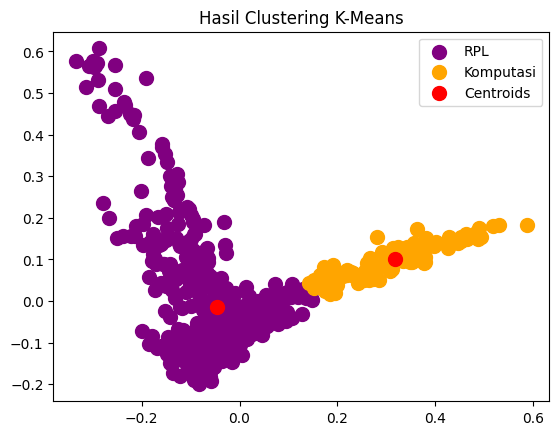

In [ ]:
#Visualisasi cluster
import matplotlib.pyplot as plt 
plt.title("Hasil Clustering K-Means")
plt.scatter(principalComponents_abstrak[pred_y == 0, 0], principalComponents_abstrak[pred_y == 0, 1], s = 100, c = 'purple', label = 'RPL')
plt.scatter(principalComponents_abstrak[pred_y == 1, 0], principalComponents_abstrak[pred_y == 1, 1], s = 100, c = 'orange', label = 'Komputasi')

#Plotting titik pusat cluster 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()